# Buildings in NYC

## Getting the data

The `PLUTO dataset` is distributed online by the New York City Department of City Planning as a part of its "Bytes of the Big Apple" platform. You can visit the page [here](http://www1.nyc.gov/site/planning/data-maps/open-data.page), or download the data directly [here](www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyc_pluto_16v1.zip). Then unzip the data locally&mdash;to keep things tidy I did this in the `data/pluto/` subdirectory.

In [2]:
%ls data/pluto

BK.csv  MN.csv           Plutolay16v1.pdf     QN.csv
BX.csv  PLUTODD16v1.pdf  PlutoReadme16v1.pdf  SI.csv


The `CSV` files here, one for each borough, are the components of the PLUTO dataset. The `PDF` files are support files&mdash;so-called data dictionaries explaning how the data was generated and what it means:

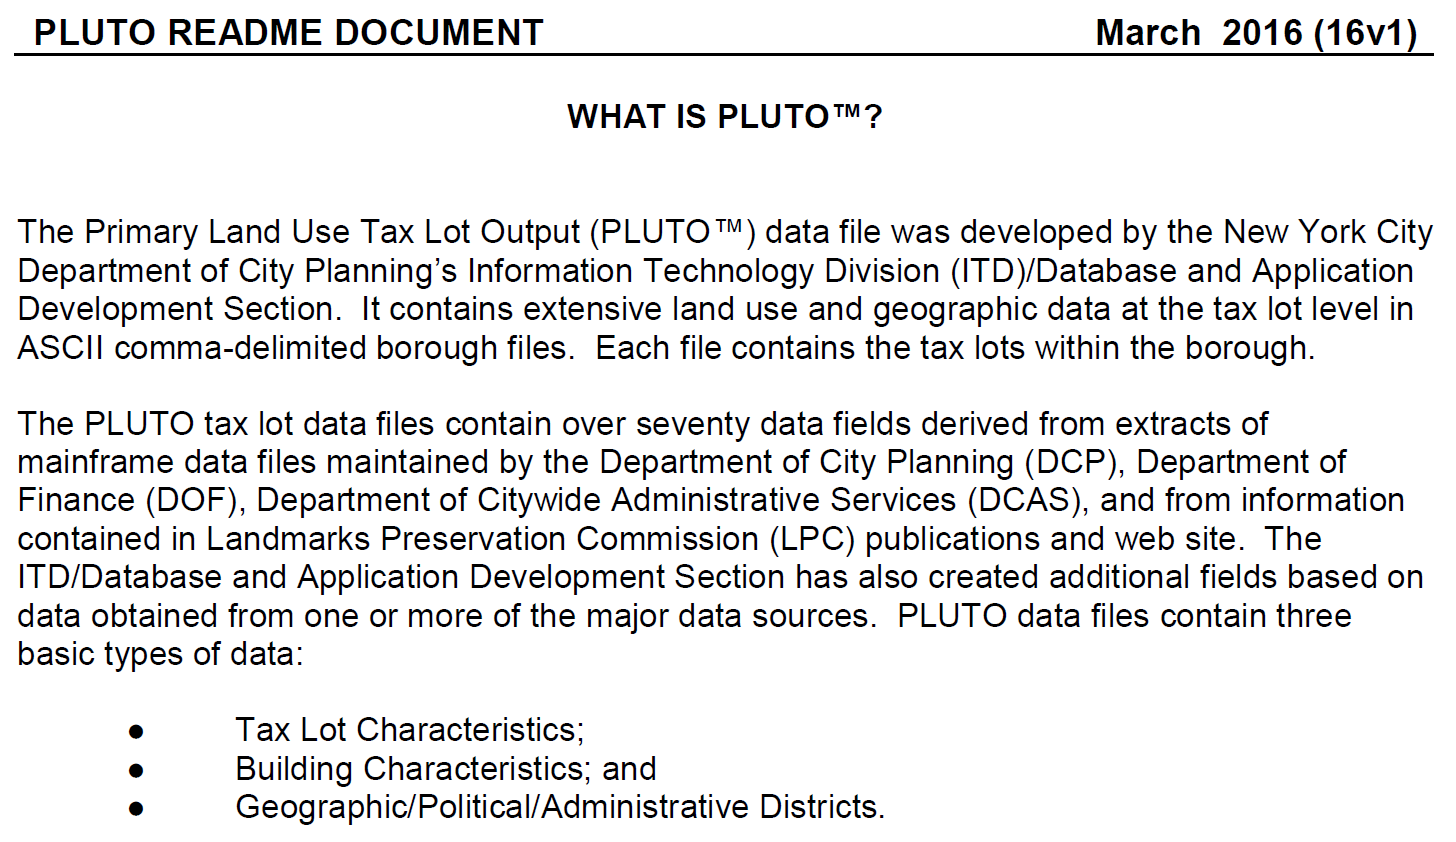

In [3]:
from IPython.display import Image

Image("figures/PLUTO Data Dictionary Screen Grab.png")

`CSV` is short for "comma-seperated values", and is a popular and very simple format for storing data, where each entry is seperated by commas.

Every programming language has a utility for reading `CSV` data. In scientific Python that's the `pandas` library (most often shortened to `pd` in practice):

In [4]:
import pandas as pd

manhattan = pd.read_csv("data/pluto/MN.csv")

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (19,22,23,24,81) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
manhattan.head(5)

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version
0,MN,1,10,101,5,1018,2,1,10004,E007,...,190225,16a,Y,199 999,10101,NaN,0,NaN,1,16v1
1,MN,1,101,101,1,1001,2,1,10004,E007,...,190636,16a,Y,199 999,10101,NaN,0,NaN,1,16v1
2,MN,1,201,101,1,1000,2,1,10004,E007,...,193648,12b,NaN,199 999,10101,NaN,0,NaN,1,16v1
3,MN,1,301,101,NaN,NaN,2,1,10004,E007,...,NaN,12b,NaN,199 999,10101,NaN,0,NaN,4,16v1
4,MN,1,401,101,NaN,NaN,2,1,10004,E007,...,NaN,12b,NaN,1 99 999,10101,NaN,0,NaN,4,16v1


(toggling on an option to add more entries to the display)

In [7]:
pd.set_option("max_columns", 100)
manhattan.sample(5)

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,HealthArea,SanitBoro,SanitDistrict,SanitSub,Address,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,Overlay1,Overlay2,SPDist1,SPDist2,LtdHeight,AllZoning1,AllZoning2,SplitZone,BldgClass,LandUse,Easements,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AreaSource,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,Ext,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,BuiltCode,YearAlter1,YearAlter2,HistDist,Landmark,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version
31421,MN,1721,55,110,200.00,2002,5,9,10027,L014,28,1500,1,10,1B,34 MT MORRIS PARK WEST,R7-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R7-2,NaN,N,C3,2,0,P,"LOGAN, ASHA",2525,5848,0,5848,0,0,0,0,0,0,2,1,4.0,4,4,25.25,100.00,25.0,57.00,E,3,N,5,5,37682,56954,0,0,1910,E,1987,0,Mount Morris Park Historic District,NaN,2.32,3.44,0,6.5,1,1017210055,0,200,999507,232997,6a,NaN,107N089,10607,NaN,0,NaN,1,16v1
33289,MN,1822,57,110,216.00,3001,3,9,10026,E058,28,2400,1,10,1B,140 WEST 113 STREET,R7-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R7-2,NaN,N,C4,2,0,P,140 WEST 113 LLC,3482,12880,0,12880,0,0,0,0,0,0,2,1,5.0,11,11,34.50,100.92,34.0,82.00,NaN,3,N,5,0,90000,490050,0,391850,1900,E,0,0,NaN,NaN,3.70,3.44,0,6.5,1,1018220057,0,216,997167,231029,6b,NaN,107N059,10701,NaN,0,NaN,1,16v1
25279,MN,1426,118,108,126.00,2000,2,4,10021,L016,19,4200,1,8,2A,251 EAST 71 STREET,R8B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R8B,NaN,N,A9,1,0,NaN,SCHNEIER ARTHUR,1890,2700,0,2700,0,0,0,0,0,0,2,1,4.0,1,1,18.50,102.17,18.5,64.08,NaN,3,N,5,2,146534,350766,0,0,1899,E,0,0,NaN,NaN,1.43,4.00,0,4.0,1,1014260118,0,126,995511,219290,8c,NaN,1.06E+61,10510,NaN,0,NaN,1,16v1
3020,MN,344,145,103,22.01,2001,1,1,10002,L018,7,7600,1,3,2A,48 CLINTON STREET,R7A,NaN,NaN,NaN,C1-5,NaN,NaN,NaN,NaN,C1-5/R7A,NaN,N,K4,4,0,NaN,"CLINTON SONIC ANNEX ,",2500,6525,4450,2075,0,4450,0,0,0,0,2,1,2.5,2,4,25.00,100.00,25.0,98.00,NaN,3,N,5,2,180000,638550,0,0,1942,E,1998,0,NaN,NaN,2.61,4.00,0,4.0,1,1003440145,0,2201,988551,201474,12c,NaN,102 005,10201,E-216,0,NaN,1,16v1
25156,MN,1417,17,108,110.00,2000,2,4,10065,L016,19,4900,1,8,1B,241 EAST 62 STREET,R8B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R8B,NaN,N,M1,8,0,X,RC CHUR OUR LADY OF P,5021,4788,4788,0,4788,0,0,0,0,0,2,1,2.0,0,1,50.00,100.42,50.0,100.00,NaN,3,N,5,2,1057500,1639350,1057500,1639350,1920,E,0,0,Treadwell Farm Historic District,NaN,0.95,4.00,0,4.0,1,1014170017,0,110,994344,217253,8c,NaN,1.06E+57,10510,NaN,0,NaN,1,16v1


These elements of the dataset are all things you can study!

In [8]:
manhattan.columns

Index([u'Borough', u'Block', u'Lot', u'CD', u'CT2010', u'CB2010',
       u'SchoolDist', u'Council', u'ZipCode', u'FireComp', u'PolicePrct',
       u'HealthArea', u'SanitBoro', u'SanitDistrict', u'SanitSub', u'Address',
       u'ZoneDist1', u'ZoneDist2', u'ZoneDist3', u'ZoneDist4', u'Overlay1',
       u'Overlay2', u'SPDist1', u'SPDist2', u'LtdHeight', u'AllZoning1',
       u'AllZoning2', u'SplitZone', u'BldgClass', u'LandUse', u'Easements',
       u'OwnerType', u'OwnerName', u'LotArea', u'BldgArea', u'ComArea',
       u'ResArea', u'OfficeArea', u'RetailArea', u'GarageArea', u'StrgeArea',
       u'FactryArea', u'OtherArea', u'AreaSource', u'NumBldgs', u'NumFloors',
       u'UnitsRes', u'UnitsTotal', u'LotFront', u'LotDepth', u'BldgFront',
       u'BldgDepth', u'Ext', u'ProxCode', u'IrrLotCode', u'LotType',
       u'BsmtCode', u'AssessLand', u'AssessTot', u'ExemptLand', u'ExemptTot',
       u'YearBuilt', u'BuiltCode', u'YearAlter1', u'YearAlter2', u'HistDist',
       u'Landmark', u'BuiltF

## Exercise: Counting buildings

As a simple exercise, let's take a look at which borough has what number of buildings.

Renowned Manhattan Project scientist Enrico Fermi famously loved to ask his physics students at UChicago to count seemingly nonsensical things&mdash;an exercise in creative thinking now best known as a "Fermi approximation problem" (heads up, Microsoft *loves* to ask these questions on interviews!). One particularly famous variant asked: how many piano tuners are there in the city of Chicago?

We challenge you to try it out yourself. Without any outside help, try to guess the answer to the following question: how many buildings are there in Manhattan? Group up and thinking about it!

Bous question: which borough has the most buildings?

### Answer

This information is encoded on a lot level in the `NumBuildings` attribute of the PLUTO dataset; if we extract this column and sum across it we can get an answer!

In [9]:
manhattan['NumBldgs']

0        158
1         10
2          7
3          0
4          0
5          2
6          1
7          0
8          1
9          6
10         0
11         1
12         0
13         2
14         1
15         1
16         1
17         0
18         1
19         1
20         1
21         1
22         1
23         1
24         1
25         1
26         1
27         1
28         1
29         1
        ... 
43128      1
43129      1
43130      1
43131      1
43132      1
43133      6
43134      1
43135      1
43136      1
43137      1
43138      1
43139      1
43140      1
43141      1
43142      1
43143      0
43144      1
43145      1
43146      1
43147      0
43148      1
43149      1
43150      1
43151      1
43152      1
43153      1
43154      0
43155      2
43156      0
43157      6
Name: NumBldgs, dtype: int64

In [10]:
sum(manhattan['NumBldgs'])

46634

In [11]:
brooklyn = pd.read_csv("data/pluto/BK.csv")
queens = pd.read_csv("data/pluto/QN.csv")
bronx = pd.read_csv("data/pluto/BX.csv")
staten_island = pd.read_csv("data/pluto/SI.csv")

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (18,19,21,22,24,65,66,81) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (18,19,21,22,65,66,78,81) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (18,19,21,22,65,66,81) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (18,19,21,22,23,65,66,81) have mixed types. Specify dtype option on import or set low_memory=False.
  intera

In [12]:
sum(brooklyn['NumBldgs'])

335977

In [13]:
sum(queens['NumBldgs'])

458512

In [14]:
sum(bronx['NumBldgs'])

108238

In [15]:
sum(staten_island['NumBldgs'])

140869

With a little bit more work we can get this into a neater representation, and then, from there, into a plot:

In [16]:
borough_counts = pd.Series({
                    'Manhattan': sum(manhattan['NumBldgs']),
                    'Brooklyn': sum(brooklyn['NumBldgs']),
                    'Bronx': sum(bronx['NumBldgs']),
                    'Staten Island': sum(staten_island['NumBldgs']),
                    'Queens': sum(queens['NumBldgs'])
                 })

In [17]:
borough_counts

Bronx            108238
Brooklyn         335977
Manhattan         46634
Queens           458512
Staten Island    140869
dtype: int64

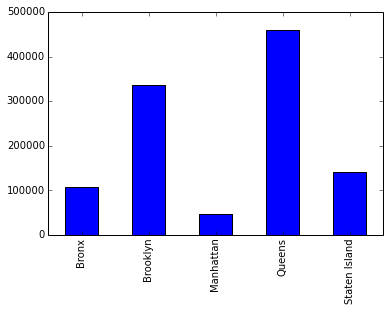

In [18]:
%matplotlib inline 

borough_counts.plot(kind='bar')

## What about number of floors per building, for example?

In literally one line of code:

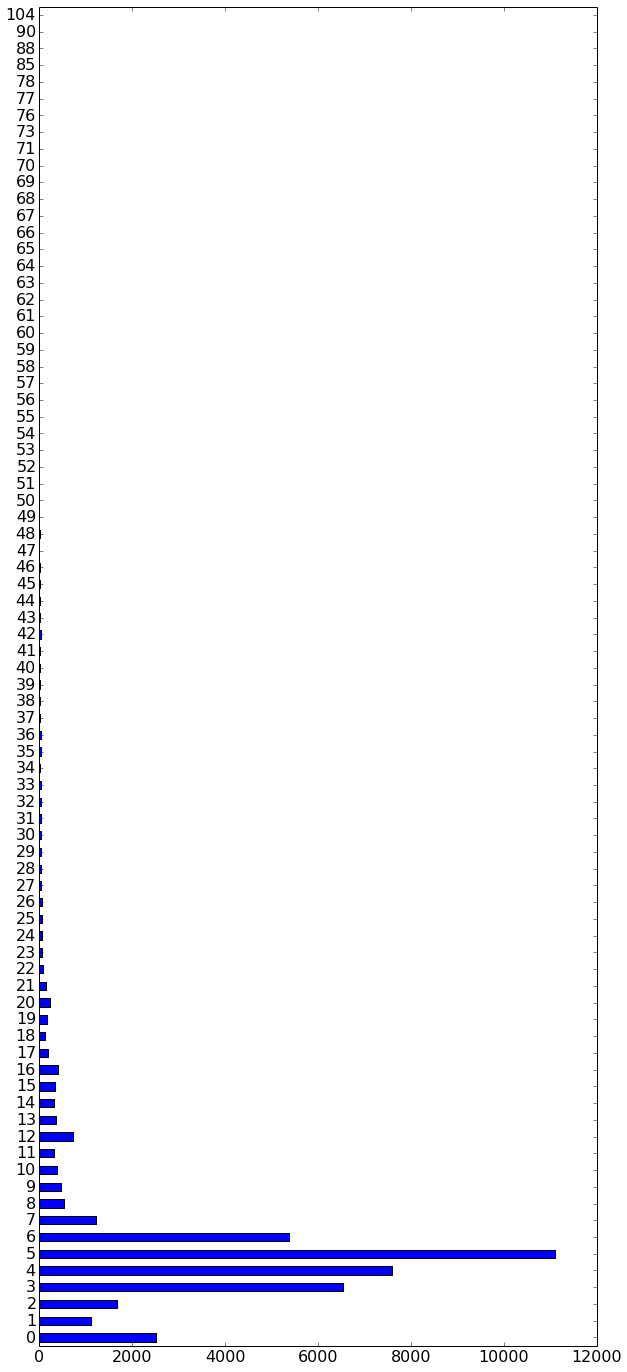

In [19]:
manhattan['NumFloors'].astype(int).value_counts().sort_index().plot(kind='barh', figsize=(10, 24), fontsize=16)

In [20]:
# manhattan[manhattan['NumFloors'].isin(manhattan['NumFloors'].sort_values(ascending=False)[:5])][['Address', 'OwnerName', 'NumFloors']]

### Going further: a look at more advanced geospatial uses of this data

* Andrew Hill from the civic tech community put together a [worldwind tour](http://andrewxhill.com/cartodb-examples/scroll-story/pluto/#0).